In [ ]:
# import packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DSBA 6211/Fundraising.csv")
df.describe(include = "all")

,zipcode2,zipcode3,zipcode4,zipcode5,homeowner,gender,numchld,wealth,home value,icmed,icavg,numprom,maxramnt,totalmonths,donor
count,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000,3120.000000
mean,0.214423,0.185256,0.214423,0.214423,0.770192,0.609295,1.069231,6.402244,1141.361859,388.217308,432.088141,49.089423,16.651397,31.136859,0.383654
std,0.410487,0.388568,0.410487,0.410487,0.420777,0.487987,0.347688,2.539978,946.642162,172.815950,168.195104,22.717130,22.223521,4.132952,0.486353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000,5.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,556.000000,278.000000,318.000000,29.000000,10.000000,29.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,822.000000,356.000000,396.000000,48.000000,15.000000,31.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.000000,1338.750000,465.000000,516.000000,65.000000,20.000000,34.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,9.000000,5945.000000,1500.000000,1331.000000,157.000000,1000.000000,37.000000,1.000000


In [ ]:
# import data set
os.chdir("/Users/xueguo/Dropbox (UNC Charlotte)/Teaching/Spring 2024/6211 in person/Data") # change directory
df = pd.read_csv("Fundraising.csv")
df.describe(include = "all")

In [ ]:
X_num = df.iloc[:, 6:14]
X_cate = df.iloc[:,0:6]
y = df['donor']

In [ ]:
from sklearn.preprocessing import StandardScaler
X_num = StandardScaler().fit_transform(X_num)
X_num

array([[-0.19914949,  1.02291174,  0.27220364, ...,  1.09673054,
        -0.47936169, -0.51711254],
       [-0.19914949,  0.23537698, -0.46842719, ..., -0.13601711,
        -0.2093342 ,  0.6928703 ],
       [ 2.67745424,  0.62914436, -0.33107768, ..., -0.75239093,
        -0.29934336, -0.51711254],
       ...,
       [-0.19914949,  0.23537698,  2.10000867, ...,  1.31686404,
         0.15070246,  1.17686343],
       [-0.19914949,  0.62914436,  0.21515076, ..., -0.97252444,
         0.15070246, -0.0331194 ],
       [-0.19914949, -0.94592516, -0.2740248 , ..., -0.13601711,
         0.24071162,  1.17686343]])

In [ ]:
X_num_df = pd.DataFrame(X_num,
                     columns = df.iloc[:,6:14].columns)
X = pd.concat([X_cate, X_num_df], axis=1)

In [ ]:
# Model 1
from sklearn.model_selection import train_test_split

X_train, X_val, y_train,y_val = train_test_split(X,y,test_size=0.3,
                                                 random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train,y_train)
model1.score(X_val,y_val)

0.6730769230769231

In [ ]:
# Model 2. With PCA analysis for all numeric variables
from sklearn.decomposition import PCA
pca=PCA()
PCA_v1 = pca.fit_transform(X_num) # Fit the model with X and apply the dimensionality reduction on X

In [ ]:
pca.explained_variance_ratio_  # explained_variance_ratio_ndarray of shape (n_components,; Percentage of variance explained by each of the selected components.

array([0.35848264, 0.1790941 , 0.12984669, 0.12235712, 0.10890962,
       0.05978982, 0.03811055, 0.00340946])

In [ ]:
pca.explained_variance_ # The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom.

array([2.86878063, 1.43321216, 1.03910655, 0.97917083, 0.87155629,
       0.47847188, 0.30498216, 0.02728442])

Text(0.5, 1.0, 'Cumulative Explained Variance by PCA Components')

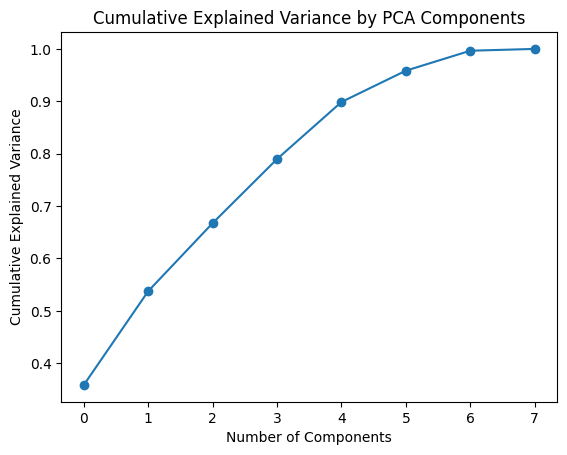

In [ ]:
# Calculate the percentage of variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative variance explained
# plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()

In [ ]:
pca.components_

array([[ 0.04411982,  0.32497221,  0.49498304,  0.5582307 ,  0.56187312,
        -0.12866999,  0.02959041,  0.05180567],
       [-0.17295256, -0.39218651,  0.16331506,  0.14518738,  0.14167103,
         0.70365134,  0.23912605, -0.4428869 ],
       [-0.52730417, -0.14648228,  0.05869783, -0.00904694, -0.01204907,
        -0.04265841,  0.58198079,  0.59690822],
       [ 0.7744591 , -0.03539401, -0.05934795, -0.00944361, -0.01293119,
         0.02383693,  0.62375615,  0.07444364],
       [-0.2911921 ,  0.55585526, -0.12504176, -0.10540697, -0.1015172 ,
        -0.20224255,  0.45304926, -0.56835253],
       [ 0.01947879,  0.58518881, -0.36817146,  0.0569463 ,  0.04683529,
         0.6324028 , -0.08766843,  0.329498  ],
       [ 0.07163161,  0.25768039,  0.75465414, -0.41103745, -0.36873504,
         0.21235568, -0.03499003,  0.08792212],
       [ 0.0009561 ,  0.00726677,  0.02576494,  0.69557371, -0.71794896,
        -0.00077521, -0.00246698, -0.00150587]])

In [ ]:
# show the PC decompositation - optional

# print(pca_data)
pca_comp = pd.DataFrame(pca.components_,
                        index = X_num_df.columns,
                        columns =["pc1", "pc2", "pc3", "pc4", "pc5", "pc6", "pc7", "pc8"])
display(pca_comp)
# data = pd.concat(pca_data, pca_comp)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
numchld,0.044120,0.324972,0.494983,0.558231,0.561873,-0.128670,0.029590,0.051806
wealth,-0.172953,-0.392187,0.163315,0.145187,0.141671,0.703651,0.239126,-0.442887
home value,-0.527304,-0.146482,0.058698,-0.009047,-0.012049,-0.042658,0.581981,0.596908
icmed,0.774459,-0.035394,-0.059348,-0.009444,-0.012931,0.023837,0.623756,0.074444
icavg,-0.291192,0.555855,-0.125042,-0.105407,-0.101517,-0.202243,0.453049,-0.568353
numprom,0.019479,0.585189,-0.368171,0.056946,0.046835,0.632403,-0.087668,0.329498
maxramnt,0.071632,0.257680,0.754654,-0.411037,-0.368735,0.212356,-0.034990,0.087922
totalmonths,0.000956,0.007267,0.025765,0.695574,-0.717949,-0.000775,-0.002467,-0.001506


In [ ]:
pca = PCA(n_components = 5)
PCA_v1 = pca.fit_transform(X)
PCA_v1

array([[ 1.97115559,  1.02293356, -0.69649744, -0.55644787,  0.12510937],
       [ 0.05768416, -0.64320155,  0.28636545, -0.17412411, -0.14337722],
       [-0.07753988, -1.18332329, -1.94903191,  1.78446257, -0.07817243],
       ...,
       [ 2.04705852,  0.994514  ,  0.91667381, -0.08544333, -1.13474823],
       [ 1.16899855, -0.59669834,  0.13371137, -0.14815757,  0.49808878],
       [-0.76763575, -0.2622617 ,  1.10130557,  0.12451102, -0.91592289]])

In [ ]:
# combine pca results with the rest of the variables together
pca1 = pd.DataFrame(PCA_v1, columns =["pc1", "pc2", "pc3", "pc4", "pc5"])

X2 = pd.concat([X_cate, pca1], axis = 1)

X2_train, X2_val,y2_train,y2_val=train_test_split(X2,
                                                y,
                                                test_size=0.3,
                                                random_state=0)

In [ ]:
model2 = LogisticRegression()
model2.fit(X2_train, y2_train)
model2.score(X2_val, y2_val)

In [ ]:
# Model3 with PCA Analysis for highly correlated variables
df.corr()

,zipcode2,zipcode3,zipcode4,zipcode5,homeowner,gender,numchld,wealth,home value,icmed,icavg,numprom,maxramnt,totalmonths,donor
zipcode2,1.000000,-0.249125,1.000000,1.000000,0.025507,-0.013794,0.026249,0.044557,-0.135478,-0.092279,-0.081953,-0.028600,-0.015032,0.008210,-0.020338
zipcode3,-0.249125,1.000000,-0.249125,-0.249125,-0.074852,-0.020582,0.002337,-0.083974,-0.238023,-0.091465,-0.106857,0.040909,0.000724,-0.021383,0.005511
zipcode4,1.000000,-0.249125,1.000000,1.000000,0.025507,-0.013794,0.026249,0.044557,-0.135478,-0.092279,-0.081953,-0.028600,-0.015032,0.008210,-0.020338
zipcode5,1.000000,-0.249125,1.000000,1.000000,0.025507,-0.013794,0.026249,0.044557,-0.135478,-0.092279,-0.081953,-0.028600,-0.015032,0.008210,-0.020338
homeowner,0.025507,-0.074852,0.025507,0.025507,1.000000,0.002911,0.045229,0.064920,0.111643,0.138074,0.133026,0.003761,-0.029656,0.025650,0.058092
gender,-0.013794,-0.020582,-0.013794,-0.013794,0.002911,1.000000,-0.033273,-0.030954,-0.022055,-0.025058,-0.026248,0.033954,0.002595,-0.036908,0.202195
numchld,0.026249,0.002337,0.026249,0.026249,0.045229,-0.033273,1.000000,0.061760,-0.010206,0.050766,0.050905,-0.087367,-0.017954,-0.005034,-0.037672
wealth,0.044557,-0.083974,0.044557,0.044557,0.064920,-0.030954,0.061760,1.000000,0.258350,0.373116,0.381161,-0.413888,-0.024830,0.027617,-0.037240
home value,-0.135478,-0.238023,-0.135478,-0.135478,0.111643,-0.022055,-0.010206,0.258350,1.000000,0.733773,0.748237,-0.062467,0.055236,0.026103,0.005373
icmed,-0.092279,-0.091465,-0.092279,-0.092279,0.138074,-0.025058,0.050766,0.373116,0.733773,1.000000,0.972409,-0.050267,0.046222,0.034636,-0.023449


In [ ]:
print(X_num_df)

       numchld    wealth  home value     icmed     icavg   numprom  maxramnt  \
0    -0.199149  1.022912    0.272204  1.439813  1.610958  1.096731 -0.479362   
1    -0.199149  0.235377   -0.468427  0.195515  0.183815 -0.136017 -0.209334   
2     2.677454  0.629144   -0.331078 -0.174881 -0.333524 -0.752391 -0.299343   
3    -0.199149 -0.945925    0.348274  0.554336  0.677369  1.977265 -0.299343   
4    -0.199149  0.629144   -0.627964 -0.012833 -0.000524 -1.280711 -0.254339   
...        ...       ...         ...       ...       ...       ...       ...   
3115 -0.199149  0.629144   -0.469484 -0.296417 -0.357310 -1.148631 -0.029316   
3116 -0.199149  0.629144   -0.582533 -0.400590 -0.190810 -0.884471  0.600748   
3117 -0.199149  0.235377    2.100009  0.918944  0.879547  1.316864  0.150702   
3118 -0.199149  0.629144    0.215151  0.727959  0.552494 -0.972524  0.150702   
3119 -0.199149 -0.945925   -0.274025 -0.423740 -0.345417 -0.136017  0.240712   

      totalmonths  
0       -0.517113  

In [ ]:
X3_no_PCA=pd.concat([X_cate, X_num_df.iloc[:,[0,1,5,6,7]]],axis=1)
X3_no_PCA.head()

,zipcode2,zipcode3,zipcode4,zipcode5,homeowner,gender,numchld,wealth,numprom,maxramnt,totalmonths
0,0,1,0,0,1,1,-0.199149,1.022912,1.096731,-0.479362,-0.517113
1,1,0,1,1,1,0,-0.199149,0.235377,-0.136017,-0.209334,0.692870
2,0,0,0,0,0,1,2.677454,0.629144,-0.752391,-0.299343,-0.517113
3,0,0,0,0,1,0,-0.199149,-0.945925,1.977265,-0.299343,-0.275116
4,0,1,0,0,1,0,-0.199149,0.629144,-1.280711,-0.254339,-0.275116


In [ ]:
X3_PCA = X_num_df.iloc[:, 2:5]
X3_PCA.head()

,home value,icmed,icavg
0,0.272204,1.439813,1.610958
1,-0.468427,0.195515,0.183815
2,-0.331078,-0.174881,-0.333524
3,0.348274,0.554336,0.677369
4,-0.627964,-0.012833,-0.000524


In [ ]:
pca2 = PCA()
PCA_v2=pca2.fit_transform(X3_PCA)
print(pca2.explained_variance_ratio_)
print(pca2.explained_variance_)
pca2.components_

# print(pca_data)
pca_comp2 = pd.DataFrame(pca2.components_,
                        index = X3_PCA.columns,
                        columns =["pc1", "pc2", "pc3"])
display(pca_comp2)


[0.88048423 0.11040409 0.00911168]
[2.64229957 0.33131846 0.02734382]


,pc1,pc2,pc3
home value,0.538118,0.594508,0.597486
icmed,0.842497,-0.400457,-0.360323
icavg,0.025053,0.697276,-0.716365


In [ ]:
pca2=PCA(n_components=1)
PCA_v2=pca2.fit_transform(X3_PCA)
pcaDf = pd.DataFrame(data=PCA_v2,
                     columns=['PC1'])

In [ ]:
X3_model = pd.concat([X3_no_PCA,pcaDf],axis=1)
X3_model.head()

,zipcode2,zipcode3,zipcode4,zipcode5,homeowner,gender,numchld,wealth,numprom,maxramnt,totalmonths,PC1
0,0,1,0,0,1,1,-0.199149,1.022912,1.096731,-0.479362,-0.517113,1.964982
1,1,0,1,1,1,0,-0.199149,0.235377,-0.136017,-0.209334,0.692870,-0.026007
2,0,0,0,0,0,1,2.677454,0.629144,-0.752391,-0.299343,-0.517113,-0.481403
3,0,0,0,0,1,0,-0.199149,-0.945925,1.977265,-0.299343,-0.275116,0.921688
4,0,1,0,0,1,0,-0.199149,0.629144,-1.280711,-0.254339,-0.275116,-0.345861


In [ ]:
X3_train,X3_val,y3_train,y3_val=train_test_split(X3_model,
                                                 y,
                                                 test_size=0.3,
                                                 random_state=0)

In [ ]:
model3 = LogisticRegression()
model3.fit(X3_train,y3_train)
model3.score(X3_val,y3_val)

0.6613247863247863

In [ ]:
import numpy as np
pd.DataFrame(zip(X3_train.columns,np.transpose(model3.coef_)),
             columns=['features','coef'])

,features,coef
0,zipcode2,[-0.02185739666668196]
1,zipcode3,[0.06586971869895251]
2,zipcode4,[-0.02185739666668196]
3,zipcode5,[-0.02185739666668196]
4,homeowner,[0.2499567659582818]
5,gender,[0.8687751898733962]
6,numchld,[-0.06723314081618745]
7,wealth,[-0.02605184633785521]
8,numprom,[0.02055882189596542]
9,maxramnt,[0.05521487223307212]
